<a href="https://colab.research.google.com/github/FakeAimanHafiy/fluffy-eureka/blob/lab10/Tutorial_10_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Community Detection in Networks

The following hands on shows you how to use NetworkX (https://networkx.org/) to process network graphs and obtain several network metrics. The package NetworkX is a Python package intended for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

This hands on is based on the content from [Exploring and Analyzing Network Data with Python] 

In [ ]:
''' This cell does not need to be executed in Colaboratory as they are already installed '''
#!pip install python-louvain 
#!pip install networkx

In [ ]:
import csv
import networkx as nx
from operator import itemgetter
import community #This is the python-louvain package we installed.

In [ ]:
# Legacy cell left here for reference after Colaboratory now include drag-and-drop uploading
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# load and read the quakers_nodelist.csv
with open('quakers_nodelist.csv') as nodecsv:
  nodereader = csv.reader(nodecsv)
  nodes = [n for n in nodereader][1:]

print(nodes)

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'], ['Alexander Skene of Newtyle', 'local politician and author', 'male', '1621', '1694', '10011149'], ['James Logan', 'colonial official and scholar', 'male', '1674', '1751', '10007567'], ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'], ['Lilias Skene', 'Quaker preacher and poet', 'male', '1626', '1697', '10011152'], ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'], ['Thomas Salthouse', 'Quaker preacher and writer', 'male', '1630', '1691', '10010643'], ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'], ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'], ['Richard Claridge', 'Quaker minister and schoolmaster', 'male', '1649', '1723', '10002469'], ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'], ['Fettiplace Bellers', 'philosophical writer and playwright', 'male', '1687', '1750', '10000933'], ['Joh

In [ ]:
# load and read the quakers_edgelist.csv
with open('quakers_edgelist.csv') as nodecsv:
  edgereader = csv.reader(nodecsv)
  edges = [n for n in edgereader][1:]

print(edges)

[['George Keith', 'Robert Barclay'], ['George Keith', 'Benjamin Furly'], ['George Keith', 'Anne Conway Viscountess Conway and Killultagh'], ['George Keith', 'Franciscus Mercurius van Helmont'], ['George Keith', 'William Penn'], ['George Keith', 'George Fox'], ['George Keith', 'George Whitehead'], ['George Keith', 'William Bradford'], ['James Parnel', 'Benjamin Furly'], ['James Parnel', 'Stephen Crisp'], ['Peter Collinson', 'John Bartram'], ['Peter Collinson', 'James Logan'], ['Joseph Wyeth', 'Thomas Ellwood'], ['Alexander Skene of Newtyle', 'Lilias Skene'], ['Dorcas Erbery', 'James Nayler'], ['William Mucklow', 'George Fox'], ['Franciscus Mercurius van Helmont', 'Benjamin Furly'], ['William Dewsbury', 'Edward Burrough'], ['William Dewsbury', 'George Fox'], ['William Dewsbury', 'John Crook'], ['John Audland', 'John Camm'], ['John Audland', 'Francis Howgill'], ['John Audland', 'Edward Pyott'], ['John Audland', 'Charles Marshall'], ['John Audland', 'George Fox'], ['John Audland', 'Anne Ca

In [ ]:
nodenames = [n[0] for n in nodes]
#nodenames = [n[0] for n in nodes]
#print(nodenames)

In [ ]:
#create graph object
G = nx.Graph()

#add lists of nodes and edges 
G.add_nodes_from(nodenames)
G.add_edges_from(edges)

print(G.number_of_nodes())
print(G.number_of_edges())
#print(nx.info(G))#this one has depreciated. Because the network it looks for can crash as the limit is 1 million nodes

119
174


NetworkX provides two convenient functions for adding attributes to all of a Graph’s nodes or edges at once: 

**nx.set_node_attributes()** and **nx.set_edge_attributes()**. 

To use these functions, you’ll need your attribute data to be in the form of a Python dictionary, in which node names are the keys and the attributes you want to add are the values.

In [ ]:
#hist_sig_dict = {}
job_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [ ]:
# Extract attributes from the quakers_nodelist.csv file and insert them into the dictionaries declared above
for n in nodes:
  job_dict[n[0]] = n[1]
  gender_dict[n[0]] = n[2]
  birth_dict[n[0]] = n[3]
  death_dict[n[0]] = n[4]
  id_dict[n[0]] = n[5]

In [ ]:
print(id_dict)

{'Joseph Wyeth': '10013191', 'Alexander Skene of Newtyle': '10011149', 'James Logan': '10007567', 'Dorcas Erbery': '10003983', 'Lilias Skene': '10011152', 'William Mucklow': '10008595', 'Thomas Salthouse': '10010643', 'William Dewsbury': '10003478', 'John Audland': '10000411', 'Richard Claridge': '10002469', 'William Bradford': '10001445', 'Fettiplace Bellers': '10000933', 'John Bellers': '10000934', 'Isabel Yeamans': '10013226', 'George Fox the younger': '10004523', 'George Fox': '10004524', 'John Stubbs': '10011695', 'Anne Camm': '10001967', 'John Camm': '10001968', 'Thomas Camm': '10001969', 'Katharine Evans': '10004036', 'Lydia Lancaster': '10007110', 'Samuel Clarridge': '10002504', 'Thomas Lower': '10007626', 'Gervase Benson': '10000972', 'Stephen Crisp': '10003022', 'James Claypoole': '10002513', 'Thomas Holme': '10006100', 'John Freame': '10004564', 'John Swinton': '10011742', 'William Mead': '10008161', 'Henry Pickworth': '10009697', 'John Crook': '10003063', 'Gilbert Latey': '

In [ ]:
# Add each dictionary as a node attribute to the Graph object
nx.set_node_attributes(G,name='job',values=job_dict)
nx.set_node_attributes(G,name='gender',values=gender_dict)
nx.set_node_attributes(G,name='birth',values=birth_dict)
nx.set_node_attributes(G,name='death',values=death_dict)
nx.set_node_attributes(G,name='ID',values=id_dict)

In [ ]:
print(G.nodes['Richard Hubberthorne']['death'])

1662


In [ ]:
for n in G.nodes():
  print(n,int(G.nodes[n]['death'])-int(G.nodes[n]['birth']))

Joseph Wyeth 68
Alexander Skene of Newtyle 73
James Logan 77
Dorcas Erbery 3
Lilias Skene 71
William Mucklow 83
Thomas Salthouse 61
William Dewsbury 67
John Audland 34
Richard Claridge 74
William Bradford 89
Fettiplace Bellers 63
John Bellers 71
Isabel Yeamans 67
George Fox the younger 110
George Fox 67
John Stubbs 57
Anne Camm 78
John Camm 52
Thomas Camm 68
Katharine Evans 74
Lydia Lancaster 78
Samuel Clarridge 73
Thomas Lower 87
Gervase Benson 110
Stephen Crisp 64
James Claypoole 53
Thomas Holme 40
John Freame 80
John Swinton 59
William Mead 86
Henry Pickworth 65
John Crook 83
Gilbert Latey 79
Ellis Hookes 46
Joseph Besse 74
James Nayler 42
Elizabeth Hooten 110
George Whitehead 87
John Whitehead 66
William Crouch 83
Benjamin Furly 78
Silvanus Bevan 74
Robert Rich 72
John Whiting 66
Christopher Taylor 72
Thomas Lawson 61
Richard Farnworth 36
William Coddington 77
Thomas Taylor 65
Richard Vickris 110
Robert Barclay 42
Jane Sowle 80
Tace Sowle 83
Leonard Fell 77
Margaret Fell 88
George 

Exercise: Identify the life span for each person. [Code it]

# NetworkX Functions

<i> Using built-in functions from NetworkX to calculate network metrics</i>

In [ ]:
# Calculate network density
print("Graph Density:", nx.density(G))

Graph Density: 0.02478279447372169


In [ ]:
# Identify shortest paths
#Franciscus Mercurius van Helmont
#Anne Conway Viscountess Conway and Killultagh
path = nx.shortest_path(G, source='Anne Conway Viscountess Conway and Killultagh', target='Franciscus Mercurius van Helmont')
print("Shortest path is",path)

Shortest path is ['Anne Conway Viscountess Conway and Killultagh', 'George Keith', 'Franciscus Mercurius van Helmont']


In [ ]:
#this shows the total number of nodes in the path
#aclculating len, you should -1 from the number
print("The path length is:", len(path))

The path length is: 3


In [ ]:
# Identifying connected graph (i.e. graphs that only have one component)
print(nx.is_connected(G))#False means that there exists someone who isnt connected to everyone else
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G) #find all the components/subgraphs
largest_cmp = max(components, key=len)
print(largest_cmp)
#print(nx.density(largest_cmp))#not working

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.


{'Benjamin Furly', 'Robert Rich', 'Francis Bugg', 'William Gibson', 'Isabel Yeamans', 'Hannah Stranger', 'Edward Haistwell', 'John Bartram', 'Edward Pyott', 'Mary Penington', 'George Fox', 'Thomas Curtis', 'Thomas Camm', 'Anne Camm', 'William Edmundson', 'Isaac Norris', 'William Dewsbury', 'William Bradford', 'George Fox the younger', 'Sir Charles Wager', 'Lewis Morris', 'Leonard Fell', 'Dorcas Erbery', 'John Story', 'Franciscus Mercurius van Helmont', 'Martha Simmonds', 'Richard Hubberthorne', 'Samuel Bownas', 'Tace Sowle', 'William Mead', 'John ap John', 'Alexander Parker', 'Anthony Sharp', 'William Penn', 'John Whitehead', 'John Audland', 'Thomas Ellwood', 'George Keith', 'Thomas Story', 'Richard Claridge', 'John Stubbs', 'Solomon Eccles', 'David Lloyd', 'Samuel Fisher', 'Thomas Lower', 'John Penington', 'Gilbert Latey', 'Samuel Clarridge', 'David Barclay of Ury', 'William Coddington', 'John Camm', 'William Rogers', 'Silvanus Bevan', 'Joseph Besse', 'William Simpson', 'Alice Curwen'

In [ ]:
# Calculate node degree
node_deg = dict(G.degree(G.nodes()))
nx.set_node_attributes(G,name='degree',values=node_deg)

In [ ]:
# Display graph node details
print(G.nodes['Richard Hubberthorne'])

{'job': 'Quaker activist', 'gender': 'male', 'birth': '1628', 'death': '1662', 'ID': '10006314', 'degree': 2}


In [ ]:
# Sort the degrees of nodes
sorted=sorted(node_deg.items(),key=itemgetter(1),reverse=True)
print("Top 20 nodes by degree")
for d in sorted[:20]:
  print(d)


Top 20 nodes by degree
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [ ]:
# Calculate node betweenness and eigenvector
#betweenness = the measure of how between that node is

bet = nx.betweenness_centrality(G)
eig = nx.eigenvector_centrality(G)

print(bet)
print(eig)

{'Joseph Wyeth': 0.0, 'Alexander Skene of Newtyle': 0.0, 'James Logan': 0.026944806605823553, 'Dorcas Erbery': 0.0, 'Lilias Skene': 0.0, 'William Mucklow': 0.0, 'Thomas Salthouse': 0.0, 'William Dewsbury': 0.0, 'John Audland': 0.04164936340077581, 'Richard Claridge': 0.026944806605823553, 'William Bradford': 0.000676034574339659, 'Fettiplace Bellers': 0.0, 'John Bellers': 0.0, 'Isabel Yeamans': 0.0, 'George Fox the younger': 0.0, 'George Fox': 0.23683257726065216, 'John Stubbs': 0.024316593960227152, 'Anne Camm': 0.0008462504225216084, 'John Camm': 0.0017637259162682885, 'Thomas Camm': 0.004187620289315204, 'Katharine Evans': 0.0, 'Lydia Lancaster': 0.0, 'Samuel Clarridge': 0.00159488973048295, 'Thomas Lower': 0.0, 'Gervase Benson': 0.0, 'Stephen Crisp': 0.00038509826645419866, 'James Claypoole': 0.012532163379621009, 'Thomas Holme': 0.013617267854555989, 'John Freame': 0.0, 'John Swinton': 0.0, 'William Mead': 0.0, 'Henry Pickworth': 0.0, 'John Crook': 0.00016297262059973924, 'Gilbert

In [ ]:
# Sort nodes by key/values e.g. betweenness
del sorted

sorted_bet=sorted(bet.items(),key=itemgetter(1),reverse=True)
print("Top 20 nodes by betweenness centrality:")
for n in sorted_bet:
  print(n)


In [ ]:
nx.set_node_attributes(G,name='betweenness',values=bet)#saving into the graph
nx.set_node_attributes(G,name='eigenvector',values=eig)

In [ ]:
#First get the top 20 nodes by betweenness as a list
top_bet=sorted_bet[:20]

#Then find and print their degree
for t in top_bet:
  degr= node_deg[t[0]]
  print("Name:", t[0],"| Betweenness:",t[1],"| Degree:",degr)

Name: William Penn | Betweenness: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness: 0.02829566854990583 | Degree: 7
Name: James Logan | Betweenness: 0.026944806605823553 | Degree: 4
Name: Richard Claridge | Betweenness: 0.02694480660582355

<i>Partitioning a network (identifying communities)</i>

In [ ]:
import community
import matplotlib.pyplot as plt
import networkx as nx

#community API
#https://perso.crans.org/aynaud/communities/api.html


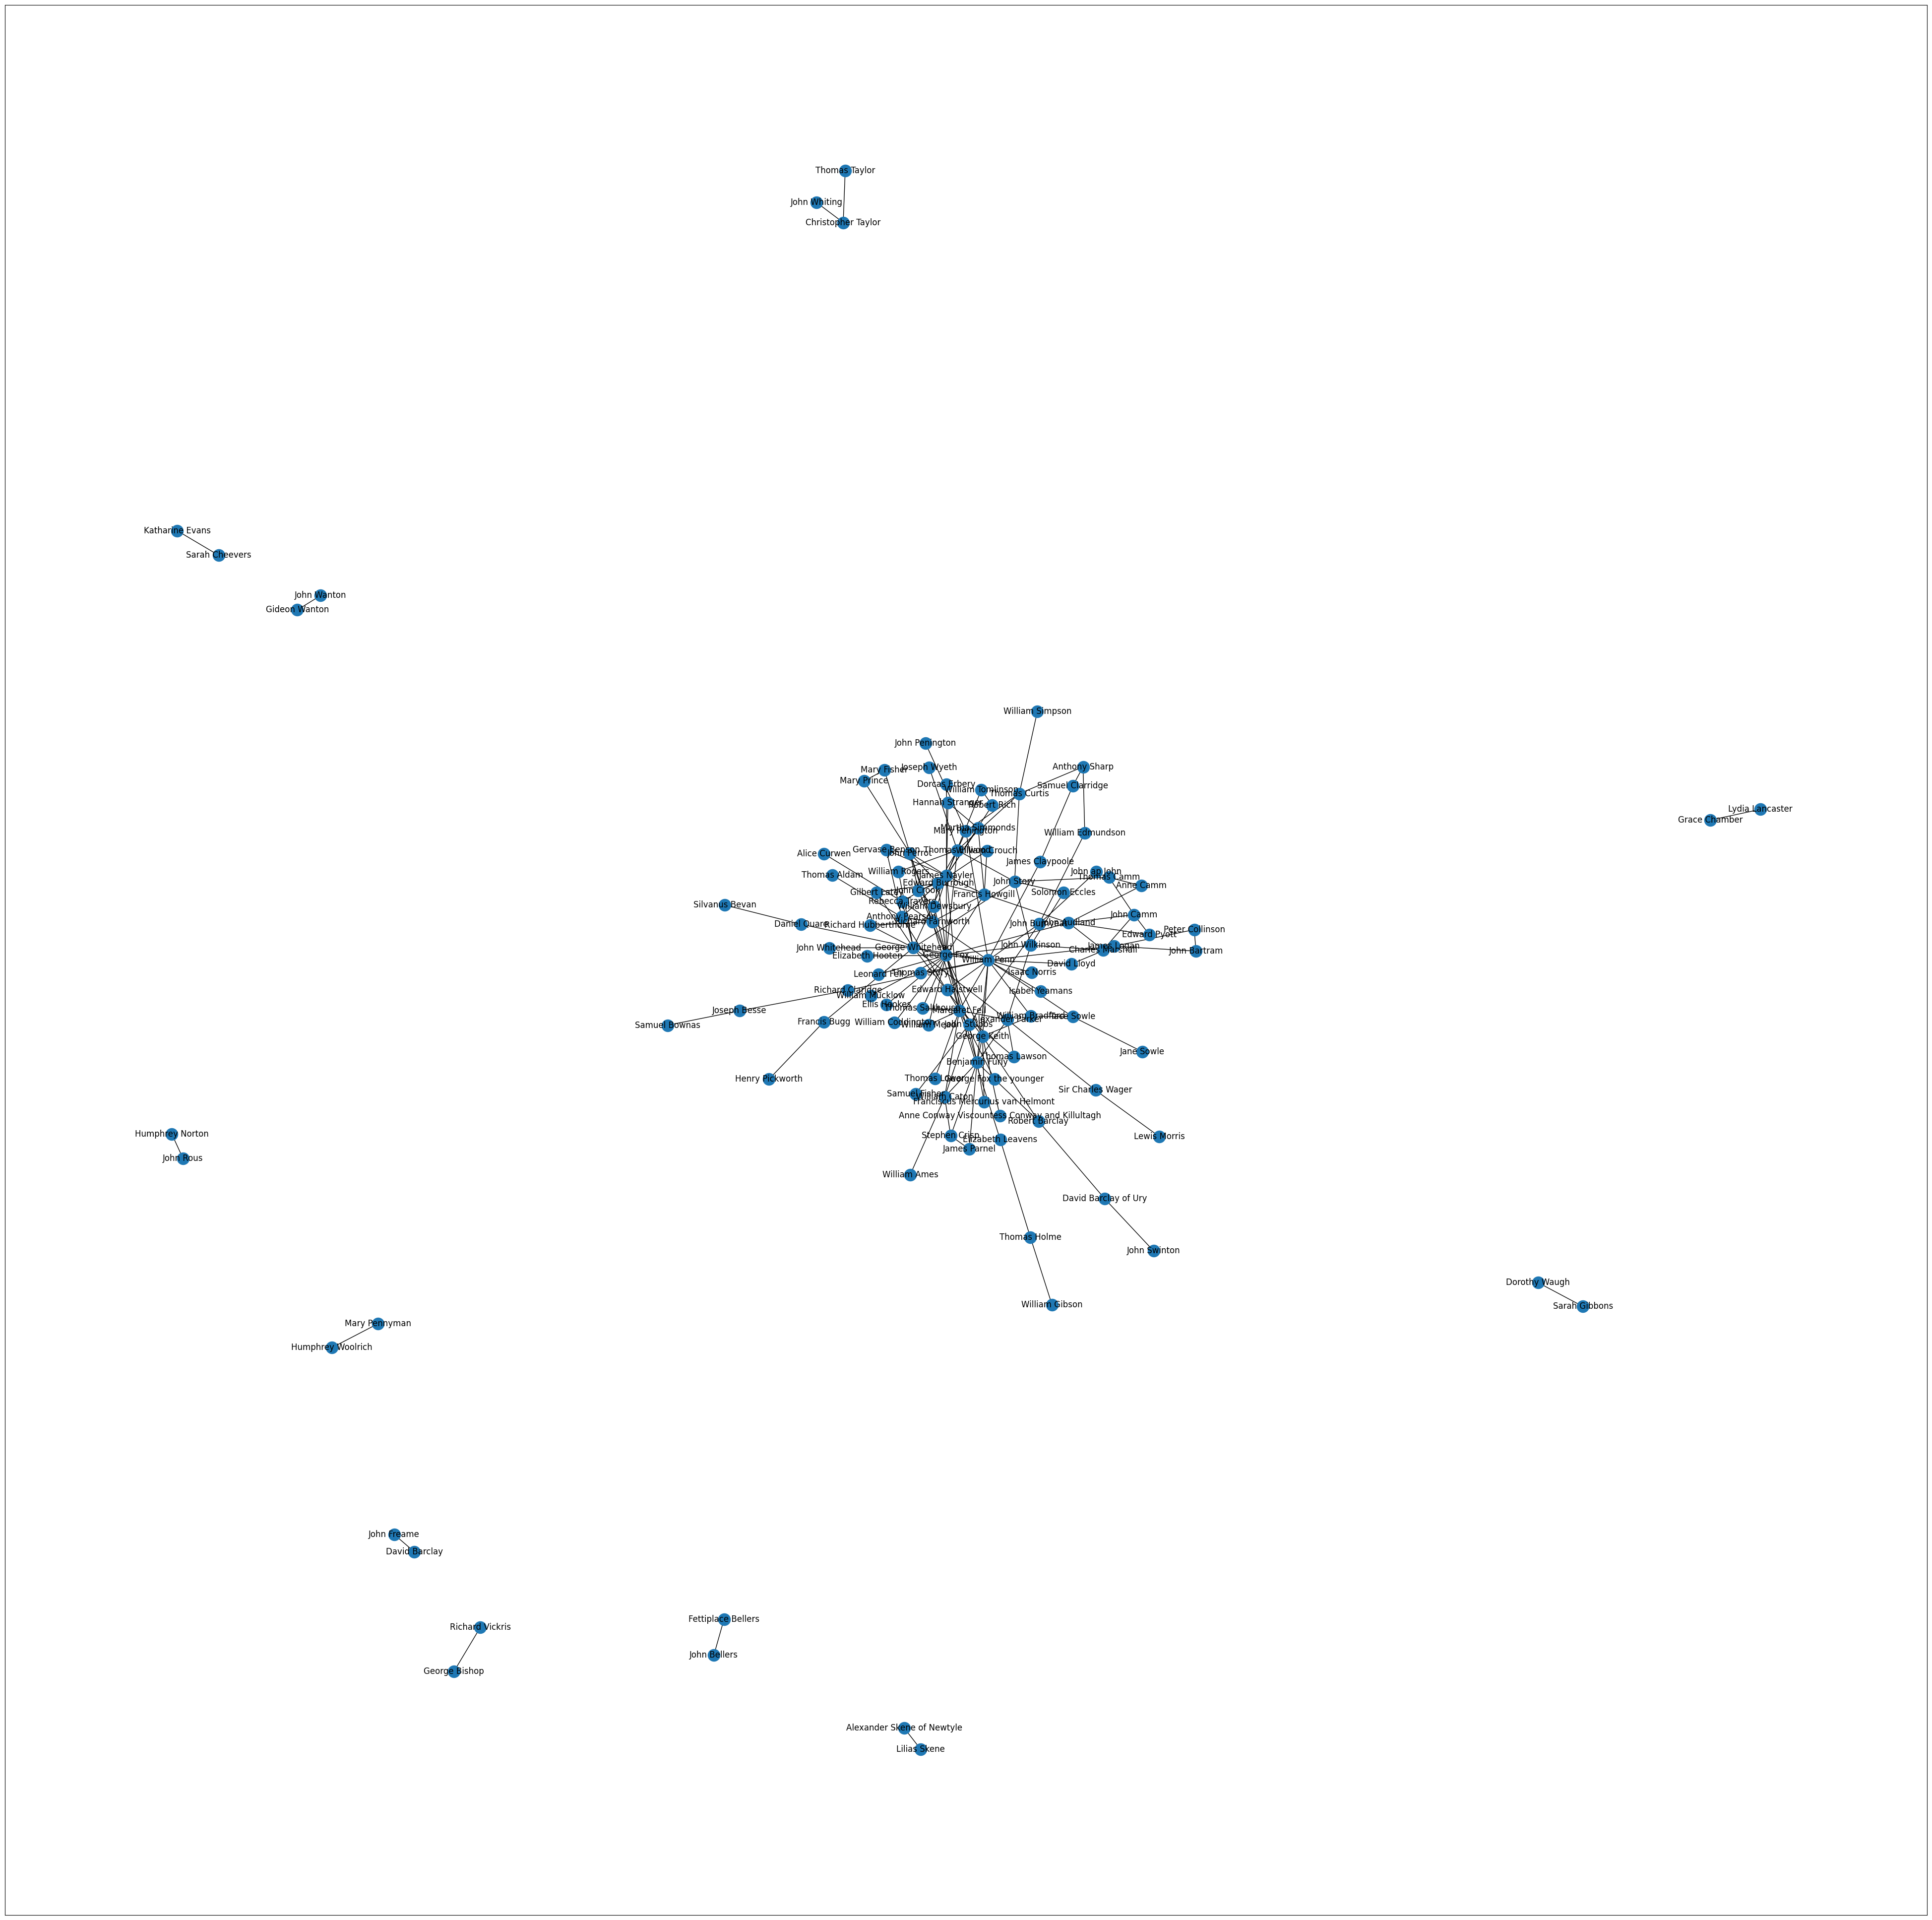

In [ ]:
plt.figure(figsize=(50,50))
nx.draw_networkx(G,pos=nx.spring_layout(G))
plt.show()

import community.community_louvain as cm
part=cm.best_partition(G)

In [ ]:
nx.set_node_attributes(G, values = part, name = "modularity")

In [ ]:
modularity = {} # Create a new, empty dictionary
for k,v in part.items(): # Loop through the community dictionary
    if v not in modularity:
        modularity[v] = [k] # Add a new key for a modularity class the code hasn't seen before
    else:
        modularity[v].append(k) # Append a name to the list for a modularity class the code has already seen

for k,v in modularity.items(): # Loop through the new dictionary
    #if len(v) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(k)+':', v) # Print out the classes and their members

Class 0: ['Joseph Wyeth', 'Thomas Curtis', 'William Rogers', 'John Penington', 'Mary Penington', 'Thomas Ellwood', 'William Simpson']
Class 1: ['Alexander Skene of Newtyle', 'Lilias Skene']
Class 11: ['James Logan', 'Richard Claridge', 'William Bradford', 'Isabel Yeamans', 'Samuel Clarridge', 'James Claypoole', 'Joseph Besse', 'Jane Sowle', 'Tace Sowle', 'Peter Collinson', 'Isaac Norris', 'Anthony Sharp', 'John Bartram', 'Edward Haistwell', 'John ap John', 'John Burnyeat', 'William Edmundson', 'William Penn', 'David Lloyd', 'Thomas Story', 'Samuel Bownas']
Class 3: ['Dorcas Erbery', 'Gervase Benson', 'James Nayler', 'William Crouch', 'Robert Rich', 'Richard Farnworth', 'Thomas Aldam', 'Francis Howgill', 'Richard Hubberthorne', 'William Tomlinson', 'Anthony Pearson', 'Martha Simmonds', 'Hannah Stranger']
Class 4: ['William Mucklow', 'William Dewsbury', 'George Fox', 'John Crook', 'Ellis Hookes', 'Elizabeth Hooten', 'William Coddington', 'Leonard Fell', 'Mary Fisher', 'Mary Prince', 'Edw

In [ ]:
#export data into Gephi's gexf format to be visualized using Gephi
nx.write_gexf(G, 'quaker.gexf')

In [ ]:
#try dunmping it into a program named gephi